## Libraries

In [55]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle

from sklearn.linear_model import LogisticRegression

## Data Preparation

In [41]:
# Load Data
df_purchase = pd.read_csv('dataset/purchase_data.csv')

# Import Scaler
scaler = pickle.load(open('dataset/scaler.pickle', 'rb'))

# Import PCA
pca = pickle.load(open('dataset/pca.pickle', 'rb'))

# Import K-means
kmeans_pca = pickle.load(open('dataset/kmeans_pca.pickle', 'rb'))

# Standardization
features = df_purchase[['Sex','Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)

# Apply PCA 
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)

# Segment data
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

# Create a copy of the data frame
df_purchase_predictors = df_purchase.copy()

# Add segment label 
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca, prefix = 'Segment', prefix_sep = '_')
df_purchase_predictors = pd.concat([df_purchase_predictors, segment_dummies ], axis =1)

df_pa = df_purchase_predictors.copy()

In [42]:
df_pa[df_pa['Segment'] >= 1]

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
101,200000002,6,1,4,1,0,0,1.59,1.87,2.01,...,52,2,159052,2,1,3,0,0,0,1
102,200000002,11,0,0,0,4,1,1.51,1.89,1.99,...,52,2,159052,2,1,3,0,0,0,1
103,200000002,18,0,0,0,0,0,1.52,1.89,1.99,...,52,2,159052,2,1,3,0,0,0,1
104,200000002,24,0,0,0,0,0,1.50,1.90,1.99,...,52,2,159052,2,1,3,0,0,0,1
105,200000002,25,0,0,0,0,0,1.50,1.90,1.99,...,52,2,159052,2,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58458,200000498,705,0,0,0,0,0,1.49,1.87,1.99,...,29,1,114784,1,0,2,0,0,1,0
58459,200000498,712,0,0,0,0,0,1.50,1.84,2.13,...,29,1,114784,1,0,2,0,0,1,0
58460,200000498,719,0,0,0,0,0,1.50,1.80,2.14,...,29,1,114784,1,0,2,0,0,1,0
58461,200000498,725,1,2,5,0,0,1.51,1.82,2.09,...,29,1,114784,1,0,2,0,0,1,0


In [34]:
purchase_segm_kmeans_pca

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

## Purchase Probability Model

In [45]:
Y = df_pa['Incidence']

In [46]:
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] + df_pa['Price_2'] + df_pa['Price_3'] + df_pa['Price_4'] + df_pa['Price_5'])/5

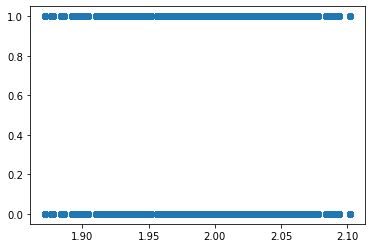

In [54]:
plt.scatter(X, df_pa['Segment_3'])

In [57]:
model_purchase = LogisticRegression(solver = 'sag')
model_purchase.fit(X, Y)

LogisticRegression(solver='sag')

In [58]:
model_purchase.coef_

array([[-2.34804235]])

## Price Elasticity of Purchase Probability

In [59]:
df_pa[['Price_1','Price_2','Price_3','Price_4','Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [61]:
price_range = np.arange(0.5, 3.5, 0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [63]:
df_price_range = pd.DataFrame(price_range)

In [65]:
Y_pr = model_purchase.predict_proba(df_price_range)

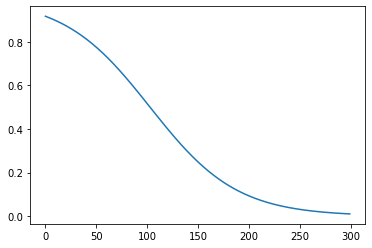

In [78]:
# Get the probability of purchase
purchase_pr = Y_pr[:][:,1]

plt.plot(purchase_pr);

In [81]:
pe = model_purchase.coef_[:,0] * price_range * (1 - purchase_pr)

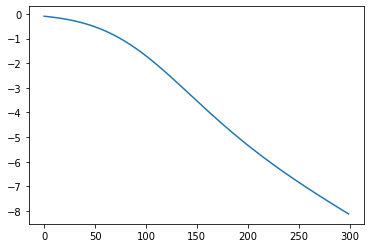

In [82]:
plt.plot(pe)

In [83]:
df_price_elasticities = pd.DataFrame(price_range)

<AxesSubplot:>

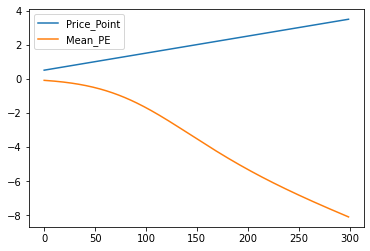

In [86]:
df_price_elasticities = df_price_elasticities.rename(columns = {0: 'Price_Point'})
df_price_elasticities['Mean_PE'] = pe
df_price_elasticities.plot()

In [87]:
pd.options.display.max_rows = None 
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096385
1,0.51,-0.100453
2,0.52,-0.104647
3,0.53,-0.108972
4,0.54,-0.113430
5,0.55,-0.118024
6,0.56,-0.122758
7,0.57,-0.127636
8,0.58,-0.132660
9,0.59,-0.137835
